In [16]:
# https://app.flourish.studio/visualisation/6445004/edit
# Look at the above link for a network graph visualization
import numpy as np
## Util functions
## TODO ensure that this works in conjunction with the .get business
def get_dept_from_roll(roll):
    DEPTS = {"01":" Aerospace Engineering ","02":' Chemical Engineering ',"04":' Civil Engineering ',
             "05":' Computer Science & Engineering ',"07":' Electrical Engineering ',
             "10":' Mechanical Engineering ',"11":' Metallurgical Engineering & Materials Science ',
             "26":' Engineering Physics ',"03":' Chemistry ',"08":' Economics (HSS) ',
             "13":' Industrial Design Centre ',"17":' Energy Science and Engineering ',
             "35":' Random ',"30":' Random ',"09":' Random ','':" Random ","18":' Random ',"06":' Random ',
             "31":' Random '} 
    try:
        return DEPTS[roll[3:5]]
    except:
        print(roll)
        assert False

        
class Post(object):
    def __init__(self,author,subject,raw_text):
#         print(author,subject)
        self.author = re.findall(roll_number,author)[0]
        self.subject = re.findall(roll_number,subject)[0]
        self.raw_text = raw_text
        self.text,self.mentions = self.get_text_mentions(raw_text)
    
    def __str__(self):
        return f"{self.author} wrote the following about {self.subject} : \n {self.text}"
 
    def get_text_mentions(self,raw_text):
        # TODO
        return raw_text, None
    def asdict(self):
        return {"Author":self.author,"Subject":self.subject,"Text":self.text}


class Person(object):
    def __init__(self,**kwargs):
        self.id = kwargs['id'] 
        self.name = kwargs['Name']
        self.degree = kwargs['Degree']
        self.dept = kwargs['Department']
        if self.dept is None:
            self.dept = get_dept_from_roll(self.id)
        self.hostel = kwargs['Hostel']
        self.ibs = kwargs['IBs'] 
        self.gender = kwargs['Gender']
        self.posts_auth = []
        self.posts_subj = []
        self.posts_tagged = []
        
    def __str__(self):
        
        ibs_str = ", ".join(list(self.ibs))
        return f"Name: {self.name}, Program: {self.degree}, Dept: {self.dept}, Hostel: {self.hostel}, Clubs Associated with: {ibs_str}"
    
    def compute_post_stats(self):
        self.auth_len = np.mean([len(x.text.split()) for x in self.posts_auth])
        self.subj_len = np.mean([len(x.text.split()) for x in self.posts_subj])
        
    def asdict(self):
        return {"Name":self.name,"id":self.id,"Degree":self.degree,"Department":self.dept,"Hostel":self.hostel,
                "IBs":self.ibs,"Posts Auth":[x.asdict() for x in self.posts_auth],
                "Posts Subj":[x.asdict() for x in self.posts_subj]
               ,"Posts Tagged":[x.asdict() for x in self.posts_tagged]}


def get_dict_stats(d1,d2=None,num=1000,aggregate='median',desc=True):
    d3 = {}
    for k in d1:
        if d2 is not None:
            d3[k] = d1[k]/(d2[k] + 1e-10)
        else:
            if aggregate == 'median':
                d3[k] = np.median(d1[k])
            elif aggregate == 'mean':
                d3[k] = np.mean(d1[k])
            else:
                d3[k] = d1[k]
    d3 = (sorted(d3.items(), key=lambda item: item[1],reverse=desc))
    for i in range(min(num,len(d3))):
        print(d3[i][0],d3[i][1])


--------------------------
Most written about
['Navneet Prabhat ', 'Vedant Anil Satav ', 'Akshat Raj Lad ', 'Poorvi Hebbar [ aka Panda ]', 'Ameya Mittal ', 'Ritik Roongta ', 'Paras Jain ', 'Rajesh Thorve ', 'Sarvesh Mehtani ', 'Jayesh Choudhary [ aka Jigness ]']
Most authored
['Paras Jain ', 'Navneet Prabhat ', 'Poorvi Hebbar [ aka Panda ]', 'Vedant Anil Satav ', 'Akshat Raj Lad ', 'Ritik Roongta ', 'Aashish Tiwari ', 'Jayesh Choudhary [ aka Jigness ]', 'Mehta Meet Amitkumar ', 'Vittesh Arora ']
Average posts written - 15.688976377952756,Average posts about - 16.992125984251967


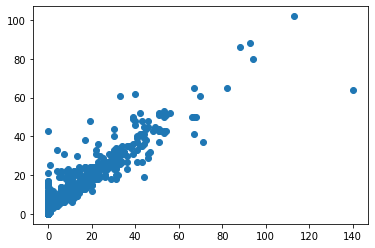

In [17]:
## Reading and loading the data
import json
import numpy as np
import matplotlib.pyplot as plt 
import csv

file = open("raw_data_latest.json")
data = json.load(file)
## Converting to edge data
with open('edges.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['A','B','C'])
    for id in data:
        for post in data[id]["Posts Auth"]:
            spamwriter.writerow([id, post["Subject"], len(post["Text"])])

with open('depts.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['A','B'])
    for id in data:
        dept = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)
        if len(data[id]["Posts Auth"]) or len(data[id]["Posts Auth"]):
            spamwriter.writerow([id, dept])

## Most popular person, simply looking at who has written the most
written_posts = {}
about_posts = {}
rolls = data.keys()
for id in data:
    written_posts[id] = len(data[id]['Posts Auth'])
for id in data:
    about_posts[id] = len(data[id]['Posts Subj'])

about_posts_sort = (sorted(about_posts.items(), key=lambda item: item[1],reverse=True))
written_posts_sort = (sorted(written_posts.items(), key=lambda item: item[1],reverse=True))
print("--------------------------")
print("Most written about")
print([data[x[0]]["Name"] for x in about_posts_sort[:10]])
print("Most authored")
print([data[x[0]]["Name"] for x in written_posts_sort[:10]])


## Average number of posts written and about
written = [written_posts[x] for x in rolls]
about   = [about_posts[x] for x in rolls]
print(f"Average posts written - {np.mean(written)},Average posts about - {np.mean(about)}")

## Scatter plot of posts written vs posts about
plt.scatter(written,about)
plt.show()

In [18]:

## Most popular department (by looking at avg number of subj posts)
dept_subj  = {}
dept_total = {}

# for id in data:
# 	dept = data[id]["Department"] 
# 	if dept is None:
# 		dept = get_dept_from_roll(id)
# 	if dept not in dept_subj:
# 		dept_subj[dept] = len(data[id]["Posts Subj"])
# 		dept_total[dept] = 1
# 	else:
# 		dept_subj[dept] += len(data[id]["Posts Subj"])
# 		dept_total[dept] += 1

# print("Department        Number of posts about")
# print("---------------------------------------")
# get_dict_stats(dept_subj,dept_total)

	
## Most popular department (by looking at avg number of authored posts)
# dept_subj  = {}
# dept_total = {}

# for id in data:
# 	dept = data[id]["Department"] 
# 	if dept is None:
# 		dept = get_dept_from_roll(id)
# 	if dept not in dept_subj:
# 		dept_subj[dept] = len(data[id]["Posts Auth"])
# 		dept_total[dept] = 1
# 	else:
# 		dept_subj[dept] += len(data[id]["Posts Auth"])
# 		dept_total[dept] += 1
# print("\n\n")
# print("Department        Number of posts authored")
# print("---------------------------------------")
# get_dict_stats(dept_subj,dept_total)



# Now we compute the medians instead
dept_subj  = {}
dept_total = {}

for id in data:
	dept = data[id]["Department"] 
	if dept is None:
		dept = get_dept_from_roll(id)
	if dept not in dept_subj:
		dept_subj[dept] = [len(data[id]["Posts Subj"])]
	else:
		if len(data[id]["Posts Subj"]) > 0:
			dept_subj[dept].append(len(data[id]["Posts Subj"]))
print("\n\n")
print("Department        Number of posts about")
print("---------------------------------------")
get_dict_stats(dept_subj)

dept_subj  = {}
dept_total = {}

for id in data:
	dept = data[id]["Department"] 
	if dept is None:
		dept = get_dept_from_roll(id)
	if dept not in dept_subj:
		dept_subj[dept] = [len(data[id]["Posts Auth"])]
	else:
		if len(data[id]["Posts Auth"]) > 0:
			dept_subj[dept].append(len(data[id]["Posts Auth"]))

print("Department        Number of posts made")
print("---------------------------------------")
get_dict_stats(dept_subj)



## Both of these seem to suggest that the CSE department is the most popular!




Department        Number of posts about
---------------------------------------
 Mechanical Engineering  23.0
 Electrical Engineering  19.5
 Computer Science & Engineering  15.0
 Civil Engineering  15.0
 Chemical Engineering  13.0
 Aerospace Engineering  9.5
 Mathematics  6.0
Department        Number of posts made
---------------------------------------
 Mechanical Engineering  30.5
 Electrical Engineering  25.0
 Computer Science & Engineering  19.0
 Civil Engineering  17.0
 Chemical Engineering  15.5
 Aerospace Engineering  12.0
 Mathematics  4.5


In [19]:
## Looking at how many edges are within the department and how many outside
id_dept_map = {}
for id in data:
    id_dept_map[id] = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)

dept_edges = {}
intra_dept_edges = {}
for id in data:
    dept = data[id].get('Department') if 'Department' in data[id] else get_dept_from_roll(id)
    # We only consider subject as the edge, since each subject has some writer as well
    if dept not in dept_edges:
        dept_edges[dept] = len(data[id]["Posts Subj"])
        intra_dept_edges[dept] = 0
    else:
        dept_edges[dept] += len(data[id]["Posts Subj"])
    for post in data[id]["Posts Subj"]:
        new_dept = id_dept_map.get(post["Author"]) if post["Author"] in id_dept_map else get_dept_from_roll(post["Author"])
        if new_dept == dept:
            intra_dept_edges[dept] += 1


print("Department           Fraction of internal edges")
print("-----------------------------------------------")
get_dict_stats(intra_dept_edges,dept_edges)


Department           Fraction of internal edges
-----------------------------------------------
 Computer Science & Engineering  0.5411061285500478
 Electrical Engineering  0.499678869621034
 Civil Engineering  0.44513888888885794
 Mechanical Engineering  0.40734693877547695
 Chemical Engineering  0.40282902829025813
 Aerospace Engineering  0.36215334420875
 Mathematics  0.03846153846139053
None 0.0


In [20]:
## Now we want to see how people find friends in IITB
## To do this we look at edge, and see what is common between two people- department, hostel or IB
## We can also test other hypotheses such as close friends are when multiple things are common etc, but do we want to?

num_hostel = {}
num_dept = {}
num_IB = {}


same_hostel = {}
same_dept   = {}
same_IB     = {}

persons = []
for id in data:
    pers = Person(**data[id])
    persons.append(pers)
    if pers.dept not in num_dept:
        num_dept[pers.dept] = 1
    else:
        num_dept[pers.dept] += 1

    if pers.hostel not in num_hostel:
        num_hostel[pers.hostel] = 1
    else:
        num_hostel[pers.hostel] += 1
    for ib in pers.ibs:
        if ib not in num_IB:
            num_IB[ib] = 1
        else:
            num_IB[ib] += 1

total_students = {}
sum = 0
for dept in num_dept:
    sum += num_dept[dept]
dept_edges_ = {}
for dept in num_dept:
    total_students[dept] = num_dept[dept]/sum
    dept_edges[dept] = dept_edges[dept]*total_students[dept]

print("Department           Ratio of fractions")
print("-----------------------------------------------")
get_dict_stats(intra_dept_edges,dept_edges)
    
# for id in data:
    # Two things - 1. how close is a club to complete graph
    #              2. For a person what fraction of edges are in one of the categories?
    

Department           Ratio of fractions
-----------------------------------------------
 Mathematics  4.884615382229438
 Mechanical Engineering  4.402813721229289
 Electrical Engineering  3.788609936826538
 Aerospace Engineering  3.2276122606632907
 Computer Science & Engineering  2.3494180624220387
 Civil Engineering  2.2169662309360523
 Chemical Engineering  1.7950626874684883
None 0.0


In [21]:
## Compute ratio of internal vs external edges for each person
## This is for depts only
## We can use group centralities here!
ratio_dept = {}
ratio_hostel   = {}
ratio_ibs   = {}
ratio_random   = {"random":[]}

for id in data:
    total = 0
    cross_gen_dept = 0
    cross_gen_hostel = 0
    random = 0
    person = next(x for x in persons if x.id.lower() == id.lower())
    cross_gen_ib = dict([(y,0) for y in person.ibs])
    for post in data[id]["Posts Auth"]:
        friend = False
        try:
            subj = next(x for x in persons if x.id.lower() == post["Subject"].lower())
            if subj.dept == person.dept:
                cross_gen_dept += 1
                friend = True
            if subj.hostel == person.hostel:
                cross_gen_hostel += 1
                friend = True
            for ib in cross_gen_ib:
                if len(ib):
                    if ib in subj.ibs:
                        cross_gen_ib[ib] += 1
                        friend = True
            total+=1
            if not friend:
                random += 1
        except StopIteration:
            pass

    for post in data[id]["Posts Subj"]:
        friend = False
        try:
            subj = next(x for x in persons if x.id.lower() == post["Author"].lower())
            if subj.dept == person.dept:
                cross_gen_dept += 1
                friend = True
            if subj.hostel == person.hostel:
                cross_gen_hostel += 1
                friend = True
            for ib in cross_gen_ib:
                if len(ib):
                    if ib in subj.ibs:
                        cross_gen_ib[ib] += 1
                        friend = True
            total+=1
            if not friend:
                random += 1

        except StopIteration:
            pass

    if person.dept not in ratio_dept:
        ratio_dept[person.dept] = [cross_gen_dept/(total+1e-15)]
    else:
        ratio_dept[person.dept].append(cross_gen_dept/(total+1e-15)) 

    if person.hostel not in ratio_hostel:
        ratio_hostel[person.hostel] = [cross_gen_hostel/(total+1e-15)]
    else:
        ratio_hostel[person.hostel].append(cross_gen_hostel/(total+1e-15)) 
    for ib in cross_gen_ib:
        if ib not in ratio_ibs:
            ratio_ibs[ib] = [cross_gen_ib[ib]/(total+1e-15)]
        else:
            ratio_ibs[ib].append(cross_gen_ib[ib]/(total+1e-15)) 
    ratio_random["random"].append(random/(total+1e-15))
        
        # print(ratio)

        
## Need Bayesian Analysis here!        
print("Dept   Ratio of Same dept friends")
print("---------------------------------------")
get_dict_stats(ratio_dept,aggregate='median')

print("\n\n")
print("Hostel   Ratio of Same hostel friends")
print("---------------------------------------")
get_dict_stats(ratio_hostel,aggregate='median')

print("\n\n")
print("IB   Ratio of Same IB friends")
print("---------------------------------------")
get_dict_stats(ratio_ibs,aggregate='median')

print("\n\n")
print("Hostel   Ratio of None")
print("---------------------------------------")
get_dict_stats(ratio_random,aggregate='mean')

## There are very few random friendships!!!!!!!!!

Dept   Ratio of Same dept friends
---------------------------------------
 Computer Science & Engineering  0.75
 Aerospace Engineering  0.574468085106383
 Chemical Engineering  0.5684615384615385
 Electrical Engineering  0.5384615384615384
 Civil Engineering  0.5119047619047619
 Mechanical Engineering  0.48936170212765956
 Mathematics  0.12499999999999997



Hostel   Ratio of Same hostel friends
---------------------------------------
 Hostel 2 0.6
 Hostel 3 0.5060975609756098
 Hostel 9 0.5
 Hostel 18 0.4444444444444444
 Hostel 10 0.3999999999999999
 Hostel 5 0.35555555555555557
 Hostel 6 0.3125
 Hostel 4 0.07745098039215687
 Hostel 8 0.03773584905660377
None 0.0
 Hostel 15 0.0



IB   Ratio of Same IB friends
---------------------------------------
Hostel Council  0.33333333333333326
AZeotropy  0.28861788617886175
Institute Sports Council  0.2707641196013289
Techfest  0.2692307692307692
IITB Student Satellite Program  0.2127659574468085
SMP  0.2127659574468085
SARC  0.1964886964886965

In [22]:
## Sexism/playboy?
ratio = {}
for id in data:
    total = 0
    cross_gen = 0
    person = next(x for x in persons if x.id.lower() == id.lower())
    for post in data[id]["Posts Auth"]:
        try:
            subj = next(x for x in persons if x.id.lower() == post["Subject"].lower())
            if subj.gender != person.gender:
                cross_gen += 1
            total+=1
        except StopIteration:
            pass
#             print(post["Subject"])

    for post in data[id]["Posts Subj"]:
        try:
            subj = next(x for x in persons if x.id.lower() == post["Author"].lower())
            if subj.gender != person.gender:
                cross_gen += 1
            total+=1
        except StopIteration:
            pass

    if person.dept not in ratio:
        ratio[person.dept] = [cross_gen/(total+1e-15)]
    else:
        ratio[person.dept].append(cross_gen/(total+1e-15)) 
# print(ratio)
print("Gender   Ratio of cross gender friends")
print("---------------------------------------")
get_dict_stats(ratio,aggregate='mean')

Gender   Ratio of cross gender friends
---------------------------------------
 Aerospace Engineering  0.1895437123694523
 Mechanical Engineering  0.16106217600738493
 Chemical Engineering  0.11408965835876135
 Computer Science & Engineering  0.09628180832475156
 Civil Engineering  0.07480579576702226
 Electrical Engineering  0.058342437207699105
 Mathematics  0.04545454545454545


In [23]:
# Wordclouds of different granularity
from wordcloud import WordCloud, STOPWORDS
# print(STOPWORDS)
hindi_stopwords = ["mei","hai","bhi","tha","mein","aur","jab","tu","tera","se","toh","tujhe","apan","mai",
                   "tere","mujhe","kya","nahi","hi","ki",'ab',"pe","teri","ka","ke","hota","hua","jo","itna",'thoda',
                  'kaafi',"mera","ho",'p','h','u','xd','bhai']
for w in hindi_stopwords:
    STOPWORDS.add(w)

wc = WordCloud(background_color='white',
					stopwords =  set(STOPWORDS),
					max_words = 50, 
					random_state = 42,)


all_posts = []
for id in data:
#     pers = Person(**data[id])
#     if "Economics" in pers.dept:
    all_posts += [x["Text"].lower() for x in data[id]["Posts Subj"]]
wc.generate(' '.join(all_posts))
plt.imshow(wc)
plt.show()



ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
## Proper Graph Analysis!
import networkx as nx
G = nx.Graph()
for id in data:
    if len(id):
        G.add_node(id)

for id in data:
    if len(id):
        for post in data[id]["Posts Auth"]:
            G.add_edge(id, post["Subject"])

# print("Most influential people  (According to voterank algorithm)-")
# print("\n".join([data[x]["Name"] for x in nx.algorithms.centrality.voterank(G)[:10]]))

## Cliques - 
## Want to see what unites cliques
cliques = ([x for x in nx.algorithms.clique.find_cliques(G) if len(x)>5])
for c in cliques:
#     print(c)
    dept = ''
    hostel = ''
    dept_count   = 0
    hostel_count = 0
#     print(c)
    for id in c:
        person = next(x for x in persons if x.id.lower() == id.lower())
        if dept == '':
            dept = person.dept
            hostel = person.hostel
        if dept == person.dept:
            dept_count += 1
        if hostel == person.hostel:
            hostel_count += 1
#     if hostel_count == len(c):
#         print(f"{hostel} clique")
#     if dept_count == len(c):
#         print(f"{dept} Department clique")       
        
        
        
## Group centrality measures - make sure these are similar to the ratios above
dept_groups = {}
for pers in persons:
    if pers.dept not in dept_groups:
        dept_groups[pers.dept] = [pers.id]
    else:
        dept_groups[pers.dept].append(pers.id)
for dept in dept_groups:
    print(dept,nx.algorithms.centrality.group_closeness_centrality(G,dept_groups[dept]))
## Eigenvector centrality-
# sorted((v, f"{c:0.2f}") for v, c in centrality.items())
# print(nx.algorithms.cycles.cycle_basis(G))

 Aerospace Engineering  0.5969418960244648
 Mechanical Engineering  0.7523245984784447
 Electrical Engineering  0.767402376910017
 Chemical Engineering  0.7676174496644296
 Computer Science & Engineering  0.7553719008264462
 Mathematics  0.46948998178506374
 Civil Engineering  0.6933927245731255
 Metallurgical Engineering & Materials Science  0.721489526764934
 Economics (HSS)  0.5468327016783974
 Engineering Physics  0.5732337736932798
 Physics  0.42904564315352695
 Energy Science and Engineering  0.5266179540709812
 Chemistry  0.5673239436619718
 Industrial Design Centre  0.3911696359411309


170010004
170010005
170010006
170010007
170010008
170010009
170010010
170010011
170010012
170010013
170010014
170010016
170010017
170010018
170010019
170010020
170010021
170010022
170010024
170010026
170010027
170010029
170010030
170010031
170010032
170010033
170010034
170010035
170010037
170010038
170010039
170010040
170010041
170010042
170010044
170010045
170010046
170010047
170010049
170010050
170010053
170010054
170010058
170010059
170010061
170020001
170020002
170020003
170020004
170020005
170020006
170020007
170020008
170020009
170020010
170020011
170020012
170020013
170020014
170020015
170020016
170020017
170020018
170020019
170020020
170020021
170020022
170020023
170020024
170020025
170020027
170020028
170020029
170020030
170020031
170020032
170020033
170020034
170020035
170020036
170020037
170020038
170020039
170020040
170020041
170020042
170020044
170020045
170020046
170020047
170020048
170020049
170020050
170020051
170020052
170020053
170020054
170020055
170020056
170020057


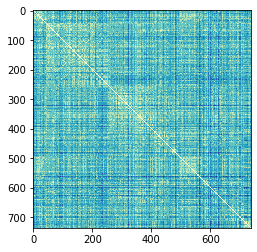

NameError: name 'persons' is not defined

In [ ]:
## Degrees of separation
all_ids = []
for id in data:
    if len(data[id]["Posts Auth"]) or len(data[id]["Posts Subj"]):
        all_ids.append(id)

shortest_paths = np.ones((len(all_ids),len(all_ids)))
shortest_paths*=10000
for i in range(len(all_ids)):
    shortest_paths[i,i] = 0


class Node:
    def __init__(self,id,parent,level):
        self.id = id
        self.index = all_ids.index(self.id)
        self.parent = parent
        self.level = level
        
## All people BFS to find degrees of separation

for start_node_ in all_ids:
    print(start_node_)
    start_node = Node(start_node_,None,0)
    queue = [start_node]
    visited = dict([(x,0) for x in all_ids])
    while True:
        node = queue.pop(0)
        visited[node.id] = 1
    #     print(data[node.id])
        edges = list(set([x["Subject"] for x in data[node.id]["Posts Auth"] if x["Subject"] in all_ids]+\
                         [x["Author"] for x in data[node.id]["Posts Subj"] if x["Author"] in all_ids]))

# Somehow optimize this code?
#         edges = [x for x in edges if shortest_paths[node.index,all_ids.index(x)]==10000]
        queue += [Node(x,node,node.level+1) for x in edges if visited[x]==0]
        parent = node.parent
        par_dist = 1
        while parent is not None:
            shortest_paths[parent.index,node.index] = min(par_dist,shortest_paths[parent.index,node.index])
            shortest_paths[node.index,parent.index] = min(par_dist,shortest_paths[node.index,parent.index])
            par_dist += 1
            parent = parent.parent
        if len(queue) == 0:
            break

np.savetxt("Degrees_of_sep.txt",shortest_paths)
json.dump(all_ids,open("Roll_list.txt","w"))

shortest_paths = np.loadtxt("Degrees_of_sep.txt")
num_ = 0

for i in range(len(shortest_paths)):
    for j in range(len(shortest_paths)):
        if shortest_paths[i,j] == 10000:
            shortest_paths[i,j] = 0    # How to handle unreachable people?

## Plotting degree of separation
plt.imshow(shortest_paths, cmap="YlGnBu", interpolation='nearest')
plt.show()

shortest_paths_sum = shortest_paths.mean(axis=1) 

path_dict = dict(zip(all_ids,shortest_paths_sum.tolist()))

# Uncomment the line below to get degree of separation stats for each person
# get_dict_stats(path_dict,desc=False)

ratio = {}
for id in path_dict:
    person = next(x for x in persons if x.id.lower() == id.lower())
    if person.dept not in ratio:
        ratio[person.dept] = [path_dict[id]]
    else:
        ratio[person.dept].append(path_dict[id]) 

print("Dept   Average degree of separation")
print("---------------------------------------")
get_dict_stats(ratio,aggregate='mean')

In [ ]:
## Check what fraction of edges are double directed

In [ ]:
## See how friends of friends affect etc

In [ ]:
## Uniqueness in lingo of dept, in inter-dept friendships etc

In [ ]:
## Which year occurs most frequently